In [3]:
# import libraries
import pandas as pd
import numpy as np
import emoji
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [4]:
# Load the datasets
threads_df = pd.read_csv("Data/threads_reviews.csv")     
twitter_df = pd.read_csv("Data/twitter_reviews.csv") 

### Looking at Threads dataset

In [5]:
# First 5 Threads
print(threads_df.head())

        source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

           review_date  
0  2023-07-08 14:18:24  
1  2023-07-19 20:52:48  
2  2023-07-06 23:03:11  
3  2023-07-10 00:53:25  
4  2023-07-06 16:57:43  


In [6]:
# Last 5 threads
print(threads_df.tail())

          source                                 review_description  rating  \
32905  App Store  This killed my dog. Mark zuckerburg strangled ...       1   
32906  App Store              Add Search and hashtag like Twitter !       1   
32907  App Store                                        bad twister       1   
32908  App Store                       Yet another trash from Meta.       1   
32909  App Store  Nothing special this app is just a copy of twi...       1   

               review_date  
32905  2023-07-06 01:23:55  
32906  2023-07-19 08:01:06  
32907  2023-07-17 06:39:13  
32908  2023-07-07 17:47:16  
32909  2023-07-07 07:01:43  


- threads dataset has few 'app_store' data points.
- to check how many 'app_store' and handle

### Looking at Twitter dataset

In [7]:
# First 5 Twitter
print(twitter_df.head())

   Unnamed: 0                             review_id       pseudo_author_id  \
0     1988084  f1584af1-3c91-4b7b-ade9-bd88c8d7a057  218447363838332529729   
1     1988085  3244b60a-8656-4fad-aaa6-7f199b6bf5bd  270227692644125640170   
2     1988086  f6aa48d3-e35a-454f-8eb2-b2605fbd5632  237950927094411183998   
3     1988087  00d82206-a895-432f-9761-baa3eb181749  153032963929626212115   
4     1988088  34a514ff-8f35-4e57-a667-18adfe416f25  174367592227204047784   

           author_name                                        review_text  \
0         Ay********an                                                 Ok   
1          Pr*******ai  App and website quality has consistently been ...   
2  St***************ch                          Great app; no complaints.   
3          A.*******ey                App crashes whenever I try to post.   
4        TA*********AT  Forced to download app cos I cant see tweets w...   

   review_rating  review_likes author_app_version     review_timesta

In [8]:
# Last 5 twitter
print(twitter_df.tail())

       Unnamed: 0                             review_id  \
34783     2022867  8eb3e09e-0269-4000-bf1d-bca068aab0d4   
34784     2022868  07147f9e-12e2-41e5-9909-9fd58833b9b1   
34785     2022869  2993c3c6-ae99-4b7a-922b-2f9ad4cc8fd1   
34786     2022870  4e199ee2-5d5a-4250-8d33-c616c9a425d3   
34787     2022871  3ef51c55-d534-45cb-847c-94a7f1fcc8a2   

            pseudo_author_id    author_name  \
34783  183174234511158497367  Av*********an   
34784  407012831597074592641             **   
34785  631000167645252964295       In****r8   
34786  291283487932051543175   Ro********er   
34787  148725782584965520105  Al*********ić   

                                             review_text  review_rating  \
34783                                 This app is a cyst              1   
34784  見つける機能廃止の代わりのハイライトの通信がやたら時間かかる。タイムラインも読み込みに時間か...              3   
34785                                        It's so bad              1   
34786  Horrible because Elon doesn't know how to do a...      

- the twitter dataset has many unwanted columns, should handle this
- it also has different language other tha english, should handle this

### Threads Info

In [9]:
# Info print for threads
print(threads_df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB
None 



### Twitter Info

In [10]:
# Info print for twitter
print(twitter_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34788 entries, 0 to 34787
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          34788 non-null  int64 
 1   review_id           34788 non-null  object
 2   pseudo_author_id    34788 non-null  object
 3   author_name         34788 non-null  object
 4   review_text         34785 non-null  object
 5   review_rating       34788 non-null  int64 
 6   review_likes        34788 non-null  int64 
 7   author_app_version  27874 non-null  object
 8   review_timestamp    34788 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.4+ MB
None


In [11]:
# Columns for confirmation
print("Threads columns:", threads_df.columns.tolist())
print("Twitter columns:", twitter_df.columns.tolist())

Threads columns: ['source', 'review_description', 'rating', 'review_date']
Twitter columns: ['Unnamed: 0', 'review_id', 'pseudo_author_id', 'author_name', 'review_text', 'review_rating', 'review_likes', 'author_app_version', 'review_timestamp']


- We see Twitter has unwanted columns not required for our project

#### Missing values - Threads

In [12]:
# Missing Values of Threads
print("\nMissing values (Threads):\n", threads_df.isnull().sum())



Missing values (Threads):
 source                0
review_description    0
rating                0
review_date           0
dtype: int64


#### Missing Values - Twitter

In [13]:
# Missing Values of Twitter
print("\nMissing values (Twitter):\n", twitter_df.isnull().sum())


Missing values (Twitter):
 Unnamed: 0               0
review_id                0
pseudo_author_id         0
author_name              0
review_text              3
review_rating            0
review_likes             0
author_app_version    6914
review_timestamp         0
dtype: int64


- Twitter has missing values in 2 columns - should handle this

## Data cleaning for threads for now

In [14]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
custom_stopwords = set([
    "app", "apps", "application", "applications",
    "thread", "threads", "instagram", "twitter","experience", "im", "account"
])
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = emoji.replace_emoji(text, replace="")
    text = re.sub(r"http\S+|www\S+", "", text) # removes url
    text = re.sub(r"[^a-zA-Z0-9 ]", "", text)
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [w for w in tokens if w not in custom_stopwords]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)



In [15]:
# Apply cleaning
threads_clean  =  threads_df.copy()
threads_clean["review_cleaned"] = threads_clean["review_description"].apply(clean_text)


print("\n--- CLEANING CHECK: original vs cleaned ---")
for i in range(3):
    print("\nOriginal:", threads_clean.loc[i, "review_description"])
    print("Cleaned :", threads_clean.loc[i, "review_cleaned"])



--- CLEANING CHECK: original vs cleaned ---

Original: Meh. Not the greatest experience on a Chromebook. Seems to be customized for phones only. Opens in a little screen that you can't expand or resize - for reasons that are a complete mystery to me. Judging from the fact that every other app I know of is resizeable, this seems like it was a conscious choice by the developers . Why you'd do something like this is beyond understanding and suggests a control freak approach. Not a great way to make a first impression.
Cleaned : meh greatest chromebook seems customized phone open little screen cant expand resize reason complete mystery judging fact every know resizeable seems like conscious choice developer youd something like beyond understanding suggests control freak approach great way make first impression

Original: Pretty good for a first launch!! Its easy to use and self-explanatory and I'd say the algorithm is good as well. It has great *potential* but a few things need improvemen

In [16]:
import nltk
from nltk.probability import FreqDist

# Make sure you have NLTK punkt tokenizer
nltk.download("punkt")

# Combine all reviews (or you can do per cluster)
all_words = " ".join(threads_clean["review_cleaned"]).split()  # or nltk.word_tokenize(text)
freq_dist = FreqDist(all_words)

# Top 20 words overall
print("Top 20 words overall:")
for word, freq in freq_dist.most_common(20):
    print(f"{word}: {freq}")


Top 20 words overall:
good: 4382
like: 3138
nice: 2264
dont: 1945
better: 1770
post: 1752
cant: 1729
people: 1570
see: 1545
need: 1455
use: 1403
follow: 1356
great: 1235
feature: 1188
please: 1137
want: 1091
new: 1047
best: 1031
one: 1015
love: 976


[nltk_data] Downloading package punkt to /Users/siri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
pip install pandas numpy scikit-learn vaderSentiment

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel



# ---------------------------
# 1. Create documents list
# ---------------------------
docs = threads_clean["review_cleaned"].astype(str).tolist()

# ---------------------------
# 2. TF-IDF Vectorizer (1–3 grams)
# ---------------------------
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    ngram_range=(1, 1),     
    stop_words="english"
)

tfidf = tfidf_vectorizer.fit_transform(docs)
feature_names = tfidf_vectorizer.get_feature_names_out()

# ---------------------------
# 3. Prepare for Coherence Calculation
# ---------------------------
tokenized_docs = [doc.split() for doc in docs]
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

# ---------------------------
# 4. Train NMF & Compute Coherence (k = 3 to 10)
# ---------------------------
topic_range = range(3, 4)
coherence_scores = {}

for k in topic_range:
    print(f"Training NMF for k={k} topics...")

    nmf_model = NMF(
        n_components=k,
        random_state=42,
        init="nndsvda",
        max_iter=400
    )

    W = nmf_model.fit_transform(tfidf)
    H = nmf_model.components_

    # Extract top words per topic
    top_words = []
    for topic in H:
        top_indices = topic.argsort()[-20:]  # 20 words per topic
        top_words.append([feature_names[i] for i in top_indices])

    # Coherence using c_v
    coherence_model = CoherenceModel(
        topics=top_words,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence = coherence_model.get_coherence()
    coherence_scores[k] = coherence
    print(f"→ Coherence = {coherence:.4f}\n")

# ---------------------------
# 5. Show Best Topic Count
# ---------------------------
best_k = max(coherence_scores, key=coherence_scores.get)
print("\n========================================")
print(f"BEST number of topics: {best_k}")
print("========================================")
print("\nCoherence scores:", coherence_scores)

# ---------------------------
# 6. Train FINAL NMF with best_k
# ---------------------------
final_nmf = NMF(
    n_components=best_k,
    random_state=42,
    init="nndsvda",
    max_iter=400
)

W_final = final_nmf.fit_transform(tfidf)
H_final = final_nmf.components_

print("\n--- TOP WORDS PER FINAL TOPIC ---\n")
for topic_idx, topic in enumerate(H_final):
    top_indices = topic.argsort()[-15:]
    top_terms = [feature_names[i] for i in top_indices]
    print(f"TOPIC {topic_idx+1}:")
    print(", ".join(top_terms))
    print()


/Users/siri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Training NMF for k=3 topics...


/Users/siri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/siri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/siri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/siri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'Li

→ Coherence = 0.4783


BEST number of topics: 3

Coherence scores: {3: 0.4782906515878471}

--- TOP WORDS PER FINAL TOPIC ---

TOPIC 1:
bad, work, love, new, pretty, think, aap, job, feature, need, use, really, like, far, good

TOPIC 2:
add, download, ui, platform, great, use, feature, new, love, work, really, wow, aap, like, nice

TOPIC 3:
new, musk, dont, use, feature, amazing, think, elon, love, great, way, far, like, best, better



In [21]:
final_nmf = NMF(
    n_components=3,
    random_state=42,
    init="nndsvda",
    max_iter=400
)

W_final = final_nmf.fit_transform(tfidf)
H_final = final_nmf.components_

print("\n--- TOP WORDS PER FINAL TOPIC ---\n")
for topic_idx, topic in enumerate(H_final):
    top_indices = topic.argsort()[-15:]
    top_terms = [feature_names[i] for i in top_indices]
    print(f"TOPIC {topic_idx+1}:")
    print(", ".join(top_terms))
    print()



--- TOP WORDS PER FINAL TOPIC ---

TOPIC 1:
bad, work, love, new, pretty, think, aap, job, feature, need, use, really, like, far, good

TOPIC 2:
add, download, ui, platform, great, use, feature, new, love, work, really, wow, aap, like, nice

TOPIC 3:
new, musk, dont, use, feature, amazing, think, elon, love, great, way, far, like, best, better



METHOD2 : SENTIMENT ANALYSIS USING VADER + KNN

By applying KMeans clustering to the compound sentiment scores, we could segment reviews into three clusters. The centroids of these clusters inform the thresholds for classifying sentiment, allowing for more objective labeling than manual cutoff values.

NMF is a major topic modelling technique hence understandable that it was not able to categorize into positive negative and neutral

In [136]:

# ----------- LOAD DATA --------------
df = threads_clean.copy()     # <-- your dataframe
# ------------------------------------


# ---------- VADER SCORES -----------
analyzer = SentimentIntensityAnalyzer()
df["compound"] = df["review_cleaned"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
compound_array = df["compound"].values.reshape(-1,1)
# ------------------------------------

# ----------- KMEANS 3 CLUSTERS -----
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
clusters = kmeans.fit_predict(compound_array)
df["cluster"] = clusters

# map centroids -> pos/neu/neg
centroids = kmeans.cluster_centers_.flatten()
order = np.argsort(centroids)
label_map = {order[0]: "negative", order[1]: "neutral", order[2]: "positive"}

df["sentiment"] = df["cluster"].map(label_map)
# ------------------------------------

print(df[["review_description","review_cleaned","compound","sentiment"]].head())


                                  review_description  \
0  Meh. Not the greatest experience on a Chromebo...   
1  Pretty good for a first launch!! Its easy to u...   
2  For a brand new app, it's very well optimized....   
3  Great app with a lot of potential! However, th...   
4  The app is good, but it needs a lot of functio...   

                                      review_cleaned  compound sentiment  
0  meh greatest chromebook seems customized phone...    0.8834  positive  
1  pretty good first launch easy use selfexplanat...    0.9893  positive  
2  brand new well optimized however missing quite...    0.8880  positive  
3  great lot potential however lot need fixed exa...    0.6343  positive  
4  good need lot functionality example searching ...    0.8176  positive  


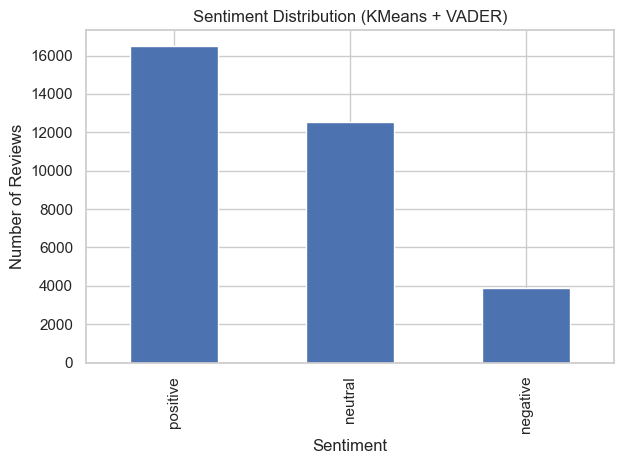

In [137]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind="bar")

plt.title("Sentiment Distribution (KMeans + VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


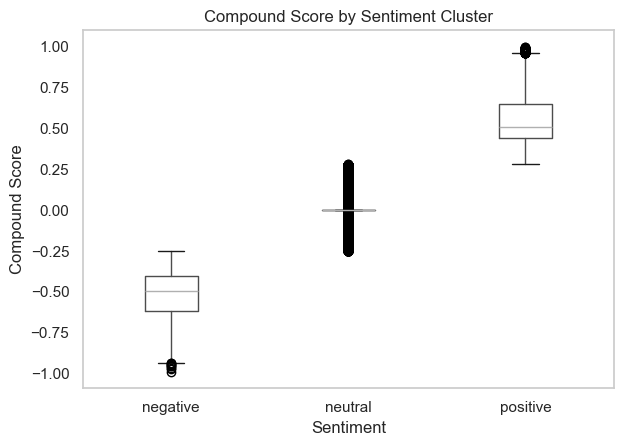

In [140]:
df.boxplot(column="compound", by="sentiment", grid=False)

plt.title("Compound Score by Sentiment Cluster")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Compound Score")
plt.tight_layout()
plt.show()


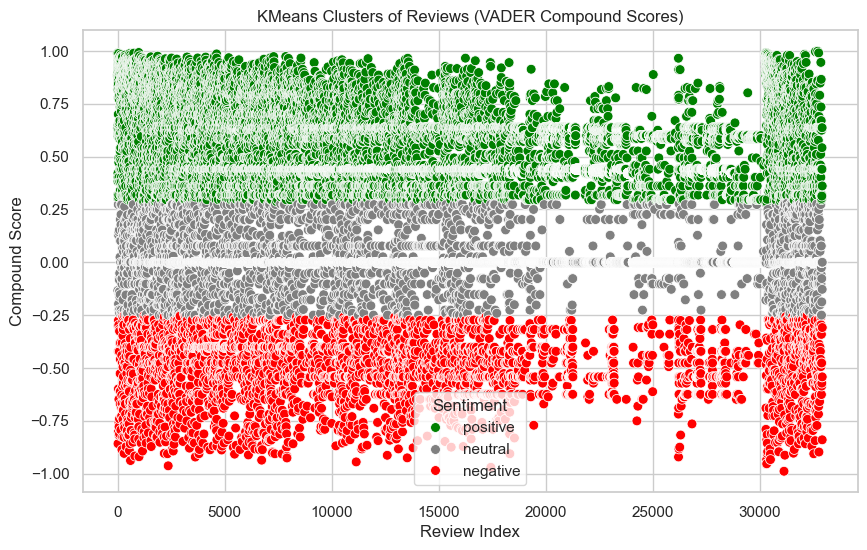

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot the clusters along the compound score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=range(len(df)), 
    y="compound", 
    hue="sentiment", 
    palette={"negative":"red", "neutral":"gray", "positive":"green"},
    data=df,
    s=50
)
plt.title("KMeans Clusters of Reviews (VADER Compound Scores)")
plt.xlabel("Review Index")
plt.ylabel("Compound Score")
plt.legend(title="Sentiment")
plt.show()


Top words in positive cluster: [('good', 4163), ('like', 2428), ('nice', 2215), ('better', 1625), ('great', 1194), ('account', 1040), ('best', 1003), ('love', 948), ('please', 892), ('people', 889)]
Top words in neutral cluster: [('account', 943), ('cant', 781), ('dont', 682), ('copy', 550), ('post', 507), ('see', 438), ('need', 433), ('use', 427), ('follow', 378), ('like', 358)]
Top words in negative cluster: [('bad', 580), ('account', 556), ('dont', 530), ('cant', 441), ('post', 377), ('like', 352), ('people', 324), ('worst', 324), ('see', 291), ('time', 279)]


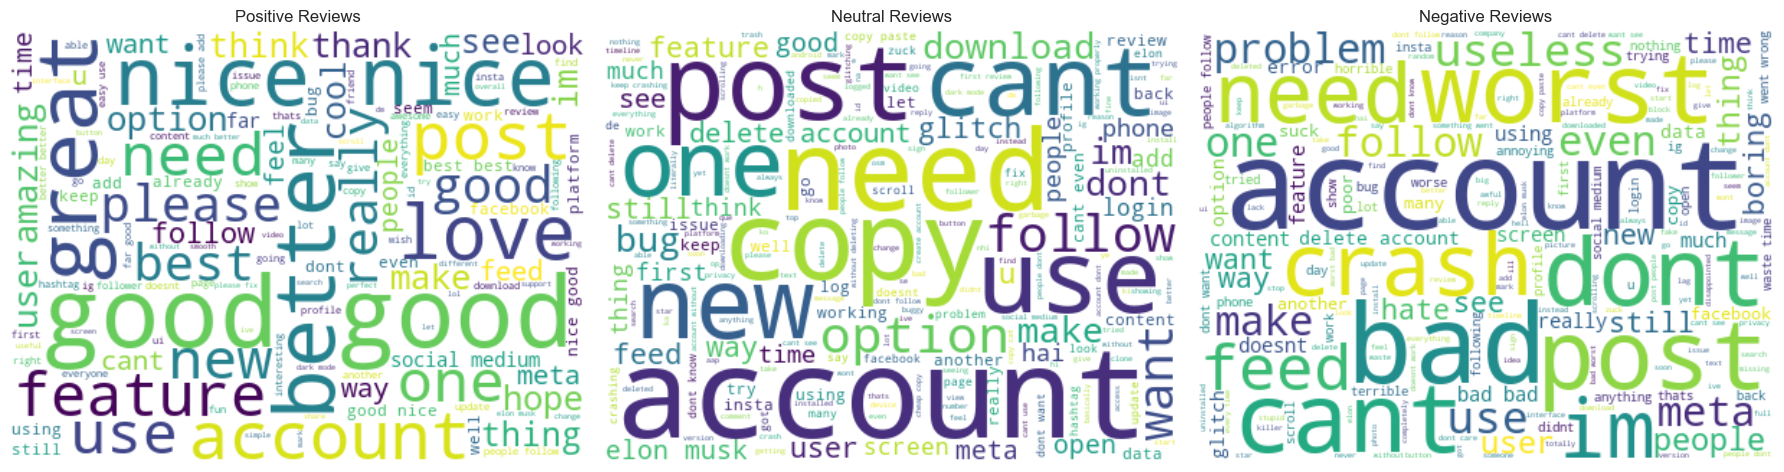

In [117]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to get top words
def get_top_words(text_series, n=10):
    words = " ".join(text_series).split()
    counter = Counter(words)
    return counter.most_common(n)

# Plot word clouds for each sentiment cluster
sentiments = df["sentiment"].unique()
plt.figure(figsize=(18,6))

for i, sentiment in enumerate(sentiments, 1):
    text = df[df["sentiment"] == sentiment]["review_cleaned"]
    
    # Generate word cloud
    wordcloud = WordCloud(width=400, height=300, background_color="white").generate(" ".join(text))
    
    # Plot
    plt.subplot(1, len(sentiments), i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{sentiment.capitalize()} Reviews")
    
    # Print top 10 words in console
    print(f"Top words in {sentiment} cluster:", get_top_words(text))

plt.tight_layout()
plt.show()
